In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

**Information on the dataset

In [3]:
df = pd.read_csv('abalone_data.csv')

In [4]:
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<p>Renaming columns</p>

In [5]:
df = df.rename(columns={'column_a':'Sex',
                       'column_b':'Length',
                       'column_c':'Diameter',
                       'column_d':'Height',
                       'column_e':'Whole weight',
                       'column_f':'Shucked weight',
                       'column_g':'Viscera weight',
                       'column_h':'Shell weight',
                       'column_i':'Rings'})

<p>Renaming columns</p>

In [6]:
df.shape

(4177, 9)

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<p>Information on column datatypes</p>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<p>Key statistical measures of numerical columns</p>

In [9]:
df.iloc[:,1:-1].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [10]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

EDA

In [12]:
df_sex_frequency = df.groupby('Sex', as_index=False)['Rings'].count().rename(columns={'Rings':'Count'})
df_sex_frequency

,Sex,Count
0,F,1307
1,I,1342
2,M,1528


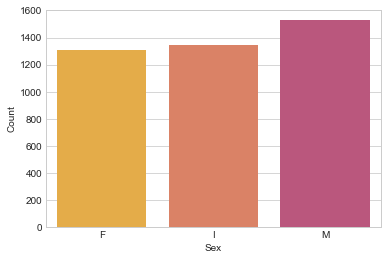

In [13]:
sns.set_style('whitegrid')
with sns.color_palette('plasma_r',5): 
    sns.barplot(y='Count', x='Sex', data=df_sex_frequency)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

(0.0, 1.0, 0.0, 1.0)

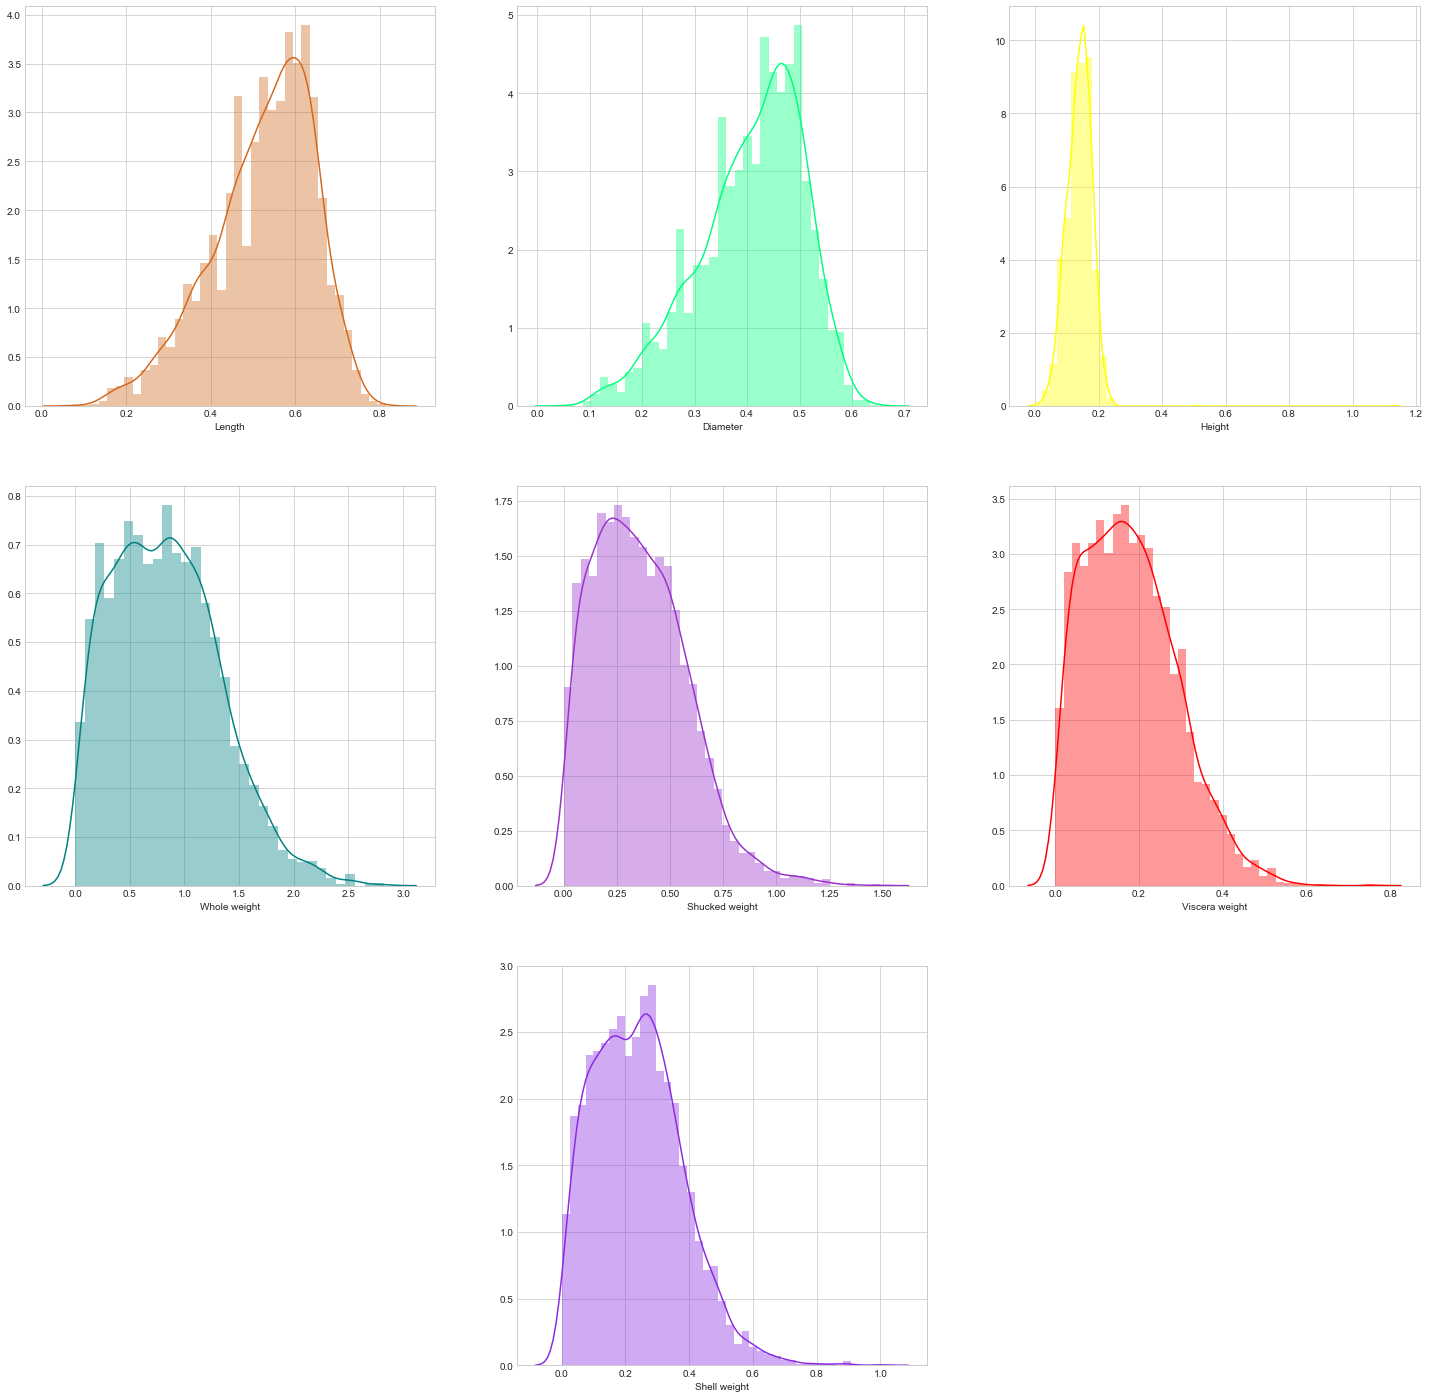

In [17]:
fig, axes = plt.subplots(3,3, figsize=(25,25))
sns.distplot(df['Length'], ax=axes[0][0], color='chocolate')
sns.distplot(df['Diameter'], ax=axes[0][1], color='springgreen')
sns.distplot(df['Height'], ax=axes[0][2], color='yellow')
sns.distplot(df['Whole weight'], ax=axes[1][0], color='teal')
sns.distplot(df['Shucked weight'], ax=axes[1][1], color='darkorchid')
sns.distplot(df['Viscera weight'], ax=axes[1][2], color='r')
sns.distplot(df['Shell weight'], ax=axes[2][1], color='blueviolet')
axes[2][0].axis('off');axes[2][2].axis('off')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[None]

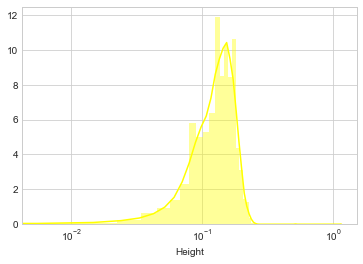

In [25]:
ax = sns.distplot(df['Height'], color='yellow', bins=100)
ax.set(xscale='log')

Text(0,0.5,'Whole weight')

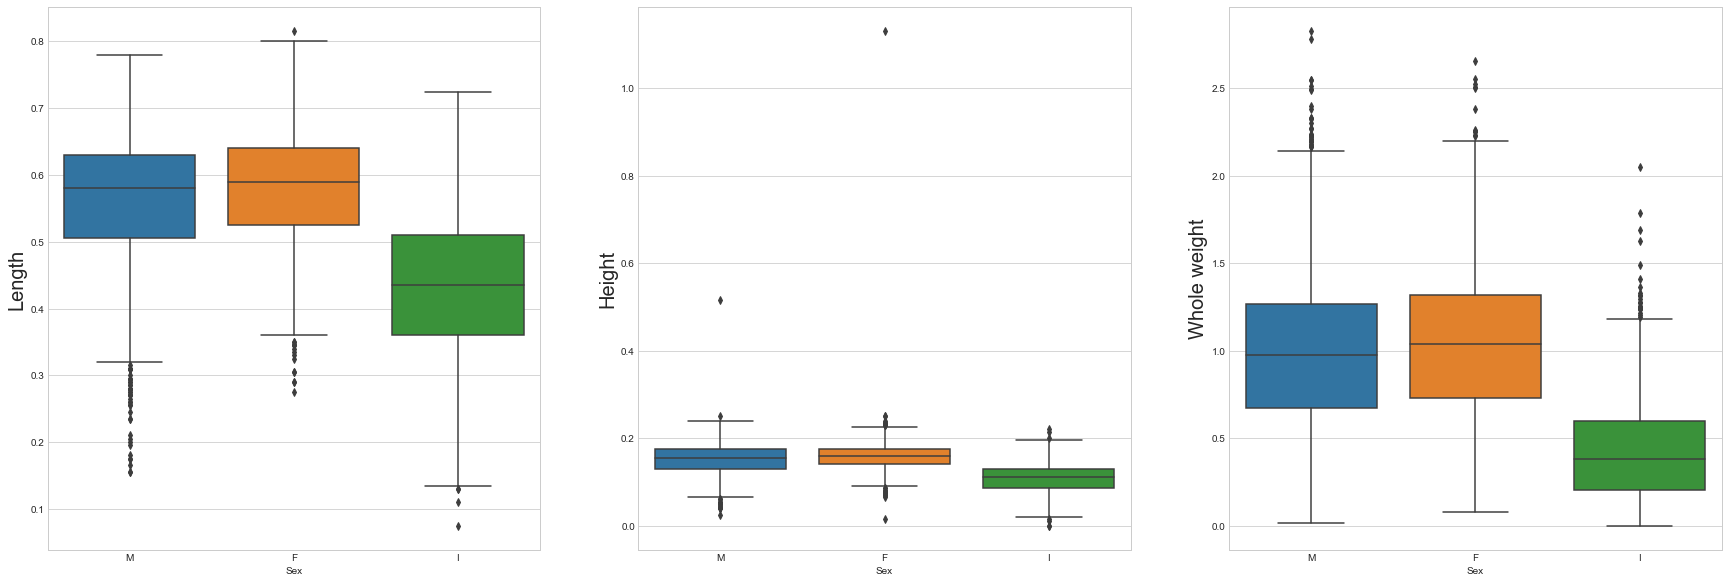

In [42]:
fig,axes = plt.subplots(1,3, figsize=(30,10))
ax1 = sns.boxplot(x='Sex', y='Length', data=df, ax=axes[0])
ax1.set_ylabel(ylabel='Length', fontsize=20)
ax2=sns.boxplot(x='Sex', y='Height', data=df, ax=axes[1])
ax2.set_ylabel(ylabel='Height', fontsize=20)
ax3=sns.boxplot(x='Sex', y='Whole weight', data=df, ax=axes[2])
ax3.set_ylabel(ylabel='Whole weight', fontsize=20)

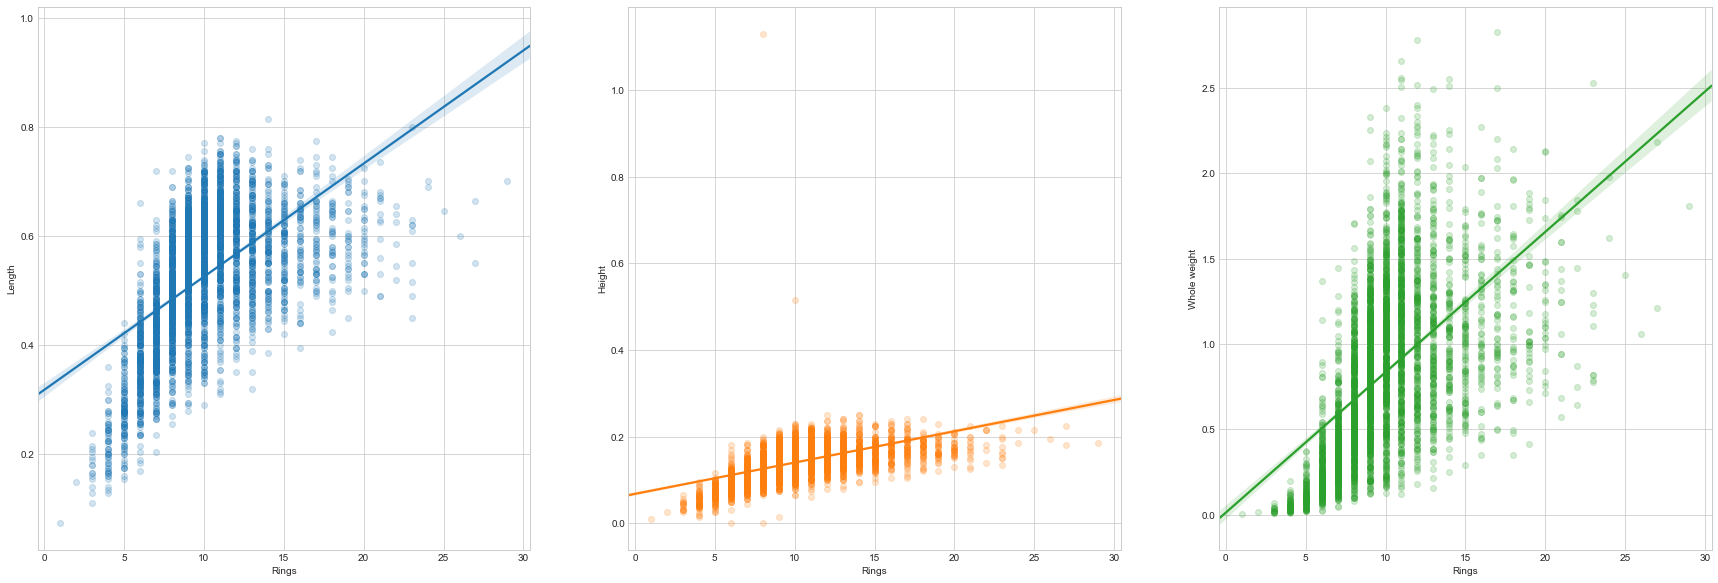

In [64]:
features = ['Length','Height','Whole weight']
fig,axes = plt.subplots(1,len(features), figsize=(30,10))
for i,val in enumerate(axes):
    sns.regplot(x='Rings', y=features[i], data=df, ax=axes[i], scatter_kws={'alpha':0.2})

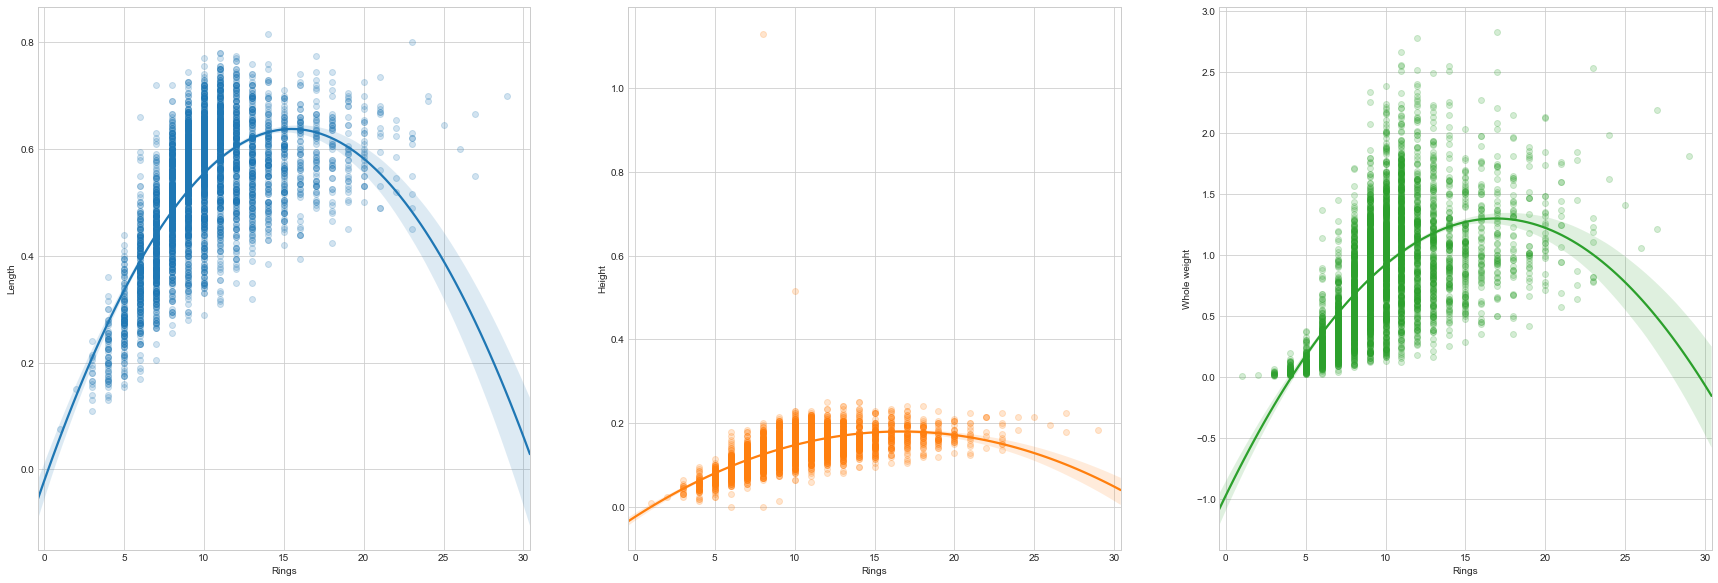

In [65]:
fig,axes = plt.subplots(1,len(features), figsize=(30,10))
for i,val in enumerate(axes):
    sns.regplot(x='Rings', y=features[i], data=df, order=2, ax=axes[i], scatter_kws={'alpha':0.2})

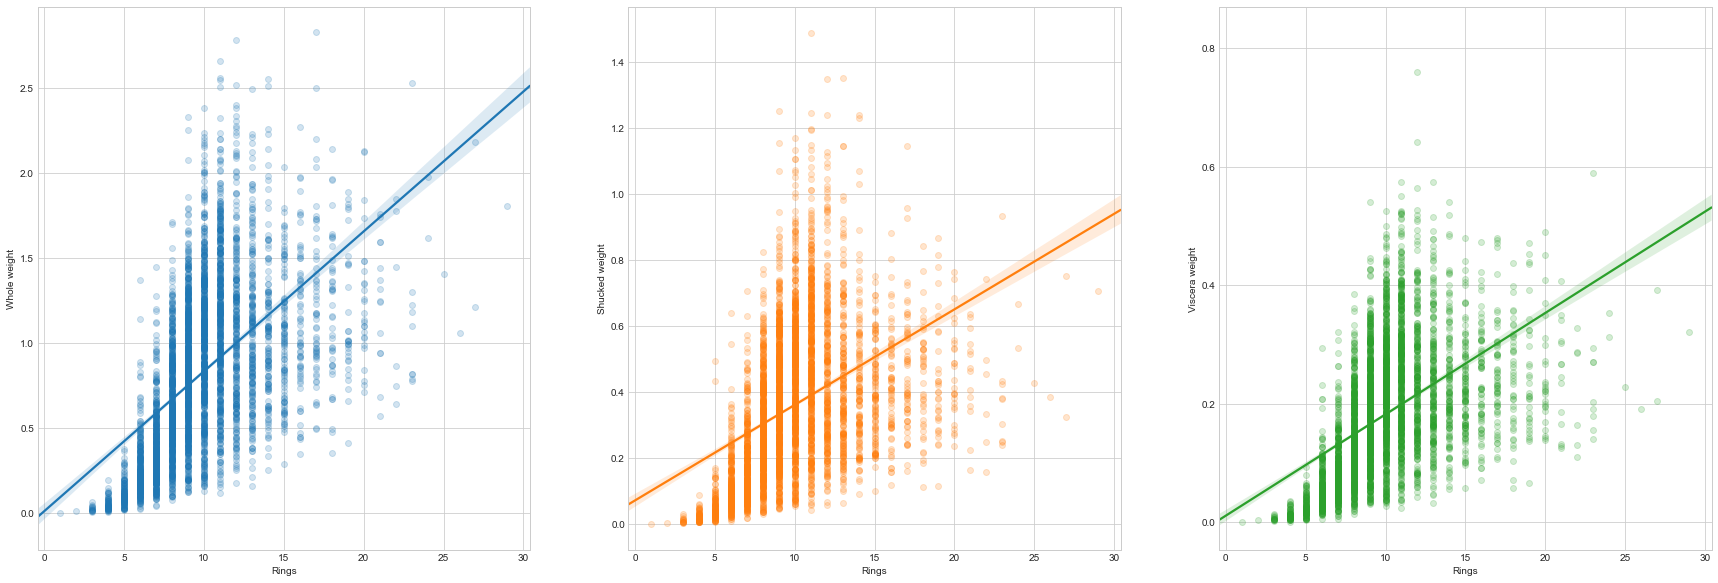

In [67]:
features = ['Whole weight','Shucked weight','Viscera weight']
fig,axes = plt.subplots(1,len(features), figsize=(30,10))
for i,val in enumerate(axes):
    sns.regplot(x='Rings', y=features[i], data=df, ax=axes[i], scatter_kws={'alpha':0.2})

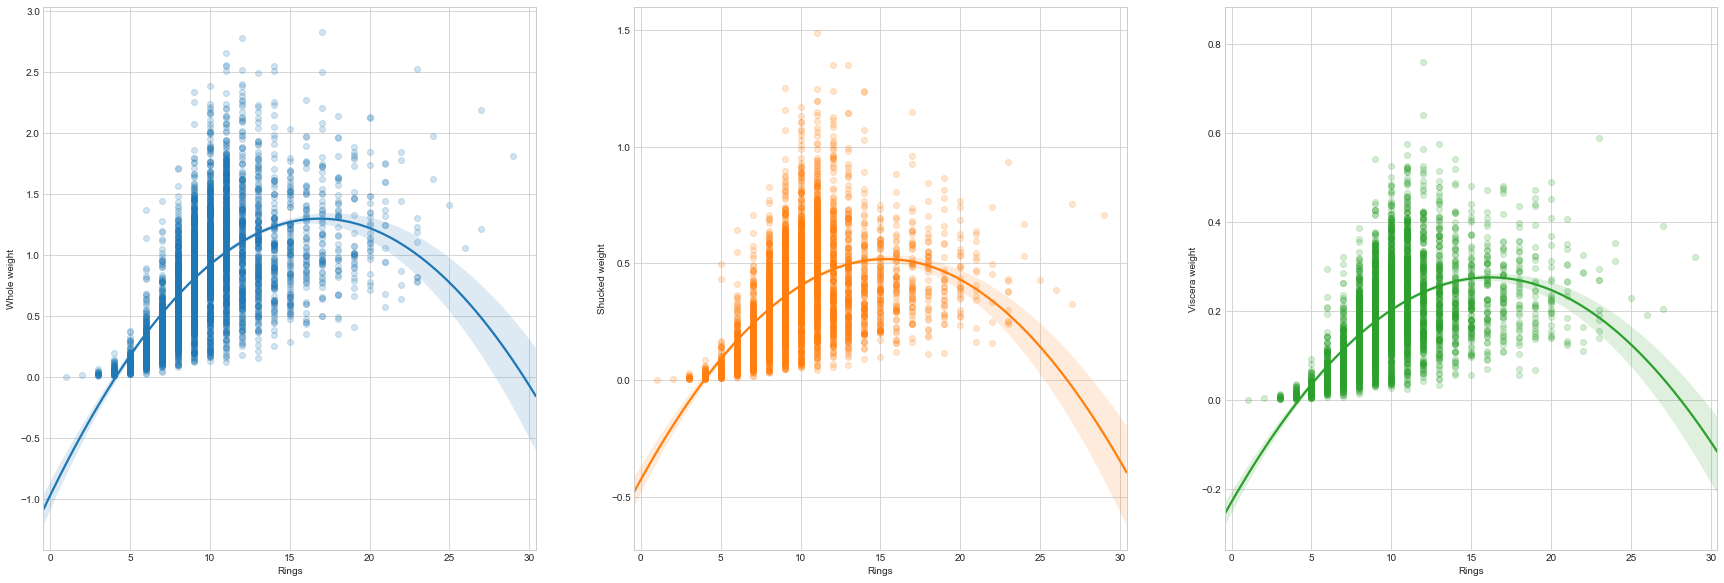

In [68]:
fig,axes = plt.subplots(1,len(features), figsize=(30,10))
for i,val in enumerate(axes):
    sns.regplot(x='Rings', y=features[i], data=df, order=2, ax=axes[i], scatter_kws={'alpha':0.2})